## Import statements


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
users_info_df = pd.read_csv('../data/users_info.csv')
users_ds_df = pd.read_csv('../data/users_daily_stats.csv')
users_cgm_df = pd.read_csv('../data/users_cgm.csv')

## Objective 1. Understand user info data

### A. Check data types and for missing data

In [5]:
users_info_df.head().T

0                         1           2  \
Unnamed: 0                       0                         1           2   
ID                            1332                      1333        1334   
DIABETES_TYPE               type_1                    type_1      type_1   
GENDER                      female                      male        male   
DATE_OF_BIRTH           2003-01-01                1968-01-01  1974-01-01   
CURRENT_AGE                     19                        54          48   
AGE_WHEN_REGISTERED             14                        51          47   
APPLICATION_NAME     logbook,kiosk  logbook,patient_uploader     logbook   
OS                     android,ios               ios,browser     browser   
HAS_CGM                       True                      True        True   
HAS_PUMP                      True                      True        True   
HAS_METER                    False                     False       False   
SYNC_COUNT                    1244                      1739        1296   
EVENT_COUNT                    NaN                       NaN         NaN   
FOOD_COUNT                     NaN                       NaN         NaN   
EXERCISE_COUNT                 NaN                       NaN         NaN   
MEDICATION_COUNT               NaN                       NaN         NaN   

                                 3           4  
Unnamed: 0                       3           4  
ID                            1335        1336  
DIABETES_TYPE               type_1      type_1  
GENDER                      female        male  
DATE_OF_BIRTH           1973-01-01  1989-01-01  
CURRENT_AGE                     49          33  
AGE_WHEN_REGISTERED             43          29  
APPLICATION_NAME     logbook,kiosk     logbook  
OS                     android,ios         ios  
HAS_CGM                       True        True  
HAS_PUMP                      True        True  
HAS_METER                     True       False  
SYNC_COUNT                     930        1221  
EVENT_COUNT                    NaN         NaN  
FOOD_COUNT                     NaN         NaN  
EXERCISE_COUNT                 NaN         NaN  
MEDICATION_COUNT               NaN         NaN

In [6]:
users_info_df.shape

(4130, 17)

In [8]:
users_info_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4130 entries, 0 to 4129
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4130 non-null   int64  
 1   ID                   4130 non-null   int64  
 2   DIABETES_TYPE        4130 non-null   object 
 3   GENDER               4130 non-null   object 
 4   DATE_OF_BIRTH        4130 non-null   object 
 5   CURRENT_AGE          4130 non-null   int64  
 6   AGE_WHEN_REGISTERED  4130 non-null   int64  
 7   APPLICATION_NAME     4128 non-null   object 
 8   OS                   4128 non-null   object 
 9   HAS_CGM              4130 non-null   bool   
 10  HAS_PUMP             4130 non-null   bool   
 11  HAS_METER            4130 non-null   bool   
 12  SYNC_COUNT           4130 non-null   int64  
 13  EVENT_COUNT          879 non-null    float64
 14  FOOD_COUNT           879 non-null    float64
 15  EXERCISE_COUNT       879 non-null    f

C:\Users\edwar\AppData\Local\Temp\ipykernel_16724\1616056872.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  users_info_df.info(verbose=True, null_counts=True)


In [9]:
users_info_df.describe()

Unnamed: 0           ID  CURRENT_AGE  AGE_WHEN_REGISTERED  \
count  4130.000000  4130.000000  4130.000000          4130.000000   
mean   2064.500000  2064.500000    42.672639            39.310412   
std    1192.372635  1192.372635    15.209471            15.107494   
min       0.000000     0.000000    18.000000            11.000000   
25%    1032.250000  1032.250000    31.000000            28.000000   
50%    2064.500000  2064.500000    41.000000            38.000000   
75%    3096.750000  3096.750000    54.000000            50.000000   
max    4129.000000  4129.000000    90.000000            89.000000   

         SYNC_COUNT   EVENT_COUNT    FOOD_COUNT  EXERCISE_COUNT  \
count   4130.000000    879.000000    879.000000      879.000000   
mean    1791.862954    669.840728    337.835040       14.763367   
std     2491.058865   3008.436593   1914.787363       97.368150   
min        3.000000      1.000000      0.000000        0.000000   
25%      655.000000      2.000000      0.000000        0.000000   
50%     1108.000000     12.000000      2.000000        0.000000   
75%     1920.750000    143.000000     39.000000        2.000000   
max    29226.000000  46595.000000  34641.000000     2068.000000   

       MEDICATION_COUNT  
count        879.000000  
mean         268.329920  
std         1315.447315  
min            0.000000  
25%            0.000000  
50%            1.000000  
75%           15.000000  
max        16481.000000

In [11]:
users_info_df.isnull().sum(axis=0).sort_values(ascending=False)



MEDICATION_COUNT       3251
EXERCISE_COUNT         3251
FOOD_COUNT             3251
EVENT_COUNT            3251
APPLICATION_NAME          2
OS                        2
AGE_WHEN_REGISTERED       0
CURRENT_AGE               0
ID                        0
HAS_CGM                   0
HAS_PUMP                  0
HAS_METER                 0
SYNC_COUNT                0
DATE_OF_BIRTH             0
GENDER                    0
DIABETES_TYPE             0
Unnamed: 0                0
dtype: int64

In [12]:
((users_info_df
  .isna()
  .mean()
  * 100)
  .pipe(lambda ser : ser[ser > 0])
)

APPLICATION_NAME     0.048426
OS                   0.048426
EVENT_COUNT         78.716707
FOOD_COUNT          78.716707
EXERCISE_COUNT      78.716707
MEDICATION_COUNT    78.716707
dtype: float64

In [13]:
users_info_df.nunique()

Unnamed: 0             4130
ID                     4130
DIABETES_TYPE             1
GENDER                    2
DATE_OF_BIRTH            69
CURRENT_AGE              69
AGE_WHEN_REGISTERED      73
APPLICATION_NAME         22
OS                        7
HAS_CGM                   2
HAS_PUMP                  2
HAS_METER                 2
SYNC_COUNT             2333
EVENT_COUNT             301
FOOD_COUNT              226
EXERCISE_COUNT           79
MEDICATION_COUNT        185
dtype: int64

### B. Gender distribution 

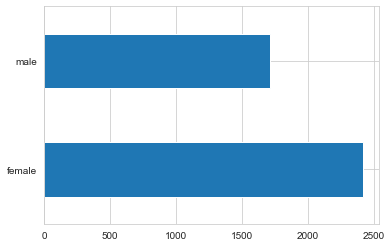

In [15]:
users_info_df.GENDER.value_counts().plot(kind='barh')
plt.show() 

### C. Age/birthday (year split) distribution

C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


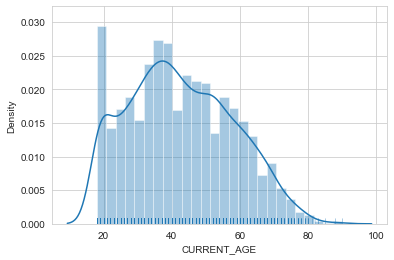

In [17]:
sns.distplot(users_info_df.CURRENT_AGE, rug=True, rug_kws={'alpha':.2});

In [19]:
# created year column of birthday
users_info_df['Year'] = users_info_df['DATE_OF_BIRTH'].str.split('-', expand=True)[0]

C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

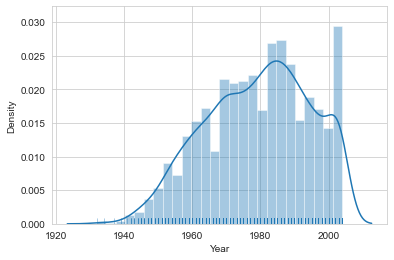

In [21]:
sns.distplot(users_info_df['Year'], rug=True, rug_kws={'alpha':.2})


#### Age and gender distribution  

In [23]:
female_data = users_info_df[users_info_df.GENDER=='female']
male_data = users_info_df[users_info_df.GENDER=='male']

C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and 

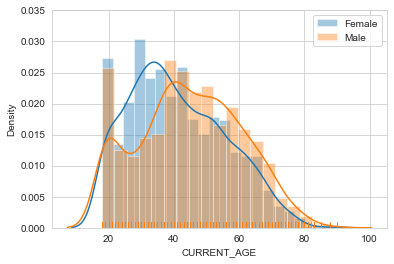

In [24]:
sns.distplot(female_data.CURRENT_AGE, kde=True, rug=True, label='Female')
sns.distplot(male_data.CURRENT_AGE, kde=True, rug=True, label='Male')
plt.legend()
plt.show()

### D. Diabetes type gender correlation

In [26]:
(users_info_df
 .pipe(lambda x: pd.crosstab(users_info_df.DIABETES_TYPE, users_info_df.GENDER))
)

GENDER         female  male
DIABETES_TYPE              
type_1           2419  1711

### E. Length of app usage distribution 

In [27]:
users_info_df = users_info_df.assign(app_usage = users_info_df.CURRENT_AGE - users_info_df.AGE_WHEN_REGISTERED)


<AxesSubplot:>

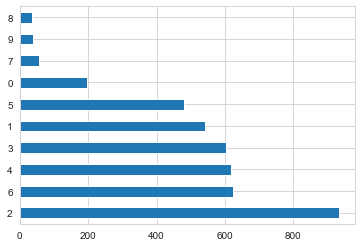

In [28]:
users_info_df.app_usage.value_counts().plot(kind='barh')

### F. Application name and OS data entries and distribution

<AxesSubplot:>

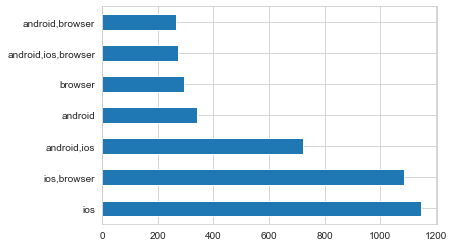

In [30]:
users_info_df.OS.value_counts().plot.barh()

<AxesSubplot:xlabel='count', ylabel='OS'>

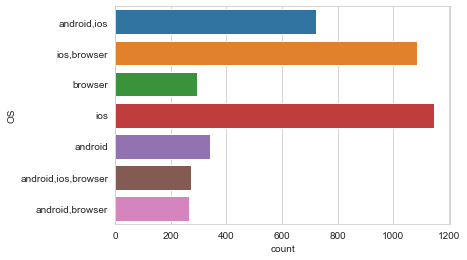

In [59]:
sns.countplot(y=users_info_df.OS)

<AxesSubplot:xlabel='count', ylabel='APPLICATION_NAME'>

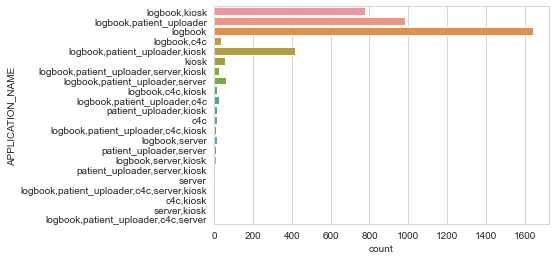

In [34]:
sns.countplot(y=users_info_df.APPLICATION_NAME)

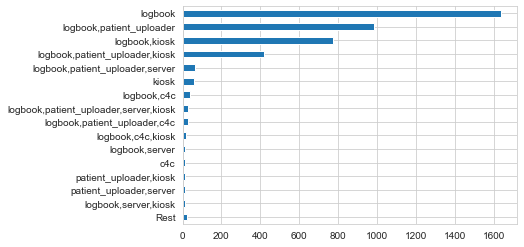

In [36]:
# limit amounts
make_counts = users_info_df.APPLICATION_NAME.value_counts()
limit = 15 
ax = (
    pd.concat([make_counts.iloc[:limit], 
               pd.Series(make_counts.iloc[limit:].sum(), index=['Rest'])])
    .iloc[::-1]
    .plot.barh()
)

### F. CGM, pump, meter distribution

In [39]:
users_info_df.HAS_CGM.value_counts()

True     4123
False       7
Name: HAS_CGM, dtype: int64

<AxesSubplot:title={'center':'Has_METER'}>

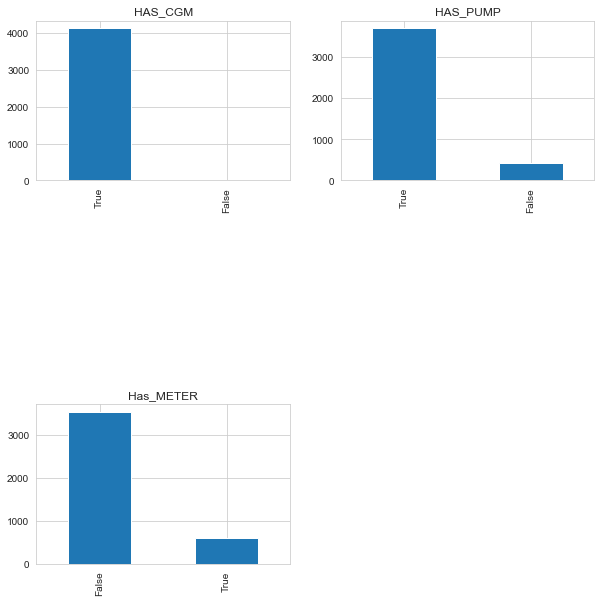

In [37]:
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)


plt.subplot2grid(fig_dims, (0, 0))
users_info_df['HAS_CGM'].value_counts().plot(kind='bar', 
                                     title='HAS_CGM')


plt.subplot2grid(fig_dims, (0, 1))
users_info_df['HAS_PUMP'].value_counts().plot(kind='bar', 
                                     title='HAS_PUMP')



plt.subplot2grid(fig_dims, (2, 0))
users_info_df['HAS_METER'].value_counts().plot(kind='bar', 
                                     title='Has_METER')


### H. Sync count distribution 

<AxesSubplot:>

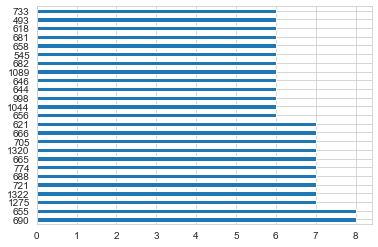

In [42]:
users_info_df.SYNC_COUNT.value_counts()[:25].plot(kind='barh')

C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SYNC_COUNT', ylabel='Density'>

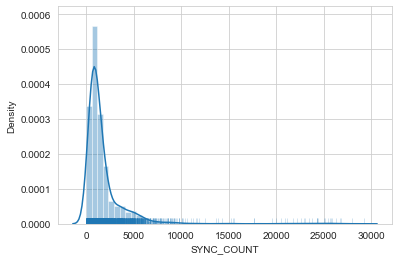

In [52]:
sns.distplot(users_info_df.SYNC_COUNT, rug=True, rug_kws={'alpha':.2})

### I. Event, food, exercise, and medication count distribution

<AxesSubplot:>

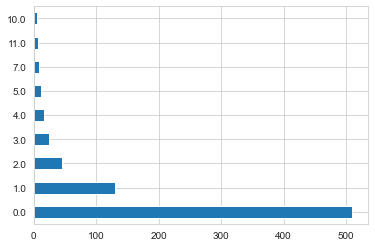

In [56]:
users_info_df.EXERCISE_COUNT.value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

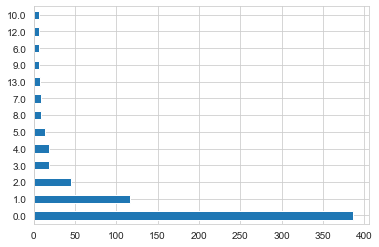

In [58]:
users_info_df.MEDICATION_COUNT.value_counts()[:10].plot(kind='barh')

# Correlation

<AxesSubplot:>

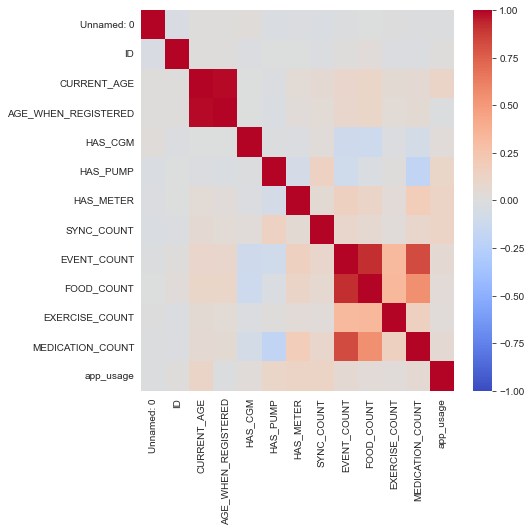

In [61]:
fig, axes = plt.subplots(figsize=(7,7))
sns.heatmap(users_info_df.corr(), cmap='coolwarm', vmin=-1, vmax=1, ax=axes)

In [62]:
(users_info_df
 .corr(method='spearman')
 .style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

# This part we will investigate the user daily stats. Objective 2


##  Investigate the data
### a. What the data types? b. Are there any null data? c. What are the distributions for numercial values?

### Nomenclature: Data Frame: df_uds

### 2.1 data & check data types

In [63]:
users_ds_df.head()

Unnamed: 0  USER_ID  TIME_CGM_ACTIVE  AVERAGE_VALUE  READING_COUNT  \
0           0     2064         1.000000     163.406250            288   
1           1     2265         1.000000     166.277778            288   
2           2     2381         1.000000     127.309028            288   
3           3     1716         0.986111     108.919014            284   
4           4     2338         1.000000     116.215278            288   

   ABOVE_180  ABOVE_250  ABOVE_400  BELOW_50  BELOW_54  ...  LOWEST_VALUE  \
0         87         22          0         0         0  ...          58.0   
1        137         39          0         0         0  ...          67.0   
2         13          0          0         0         0  ...          62.0   
3         17          0          0         0         0  ...          63.0   
4         27          0          0         0         4  ...          50.0   

   HIGHEST_VALUE        DATE  TOTAL_INSULIN TOTAL_BASAL  TOTAL_BOLUS  \
0          263.0  2021-04-01            NaN         NaN          NaN   
1          297.0  2021-04-01           30.8       21.15         9.65   
2          200.0  2021-04-01            NaN         NaN          NaN   
3          210.0  2021-04-01            NaN         NaN          NaN   
4          232.0  2021-04-01            NaN         NaN          NaN   

   HAS_REMOTE_SMBG_DATA  HAS_REMOTE_CGM_DATA HAS_REMOTE_INSULIN_DATA  \
0                 False                 True                   False   
1                 False                 True                    True   
2                 False                 True                   False   
3                 False                 True                   False   
4                 False                 True                   False   

  HAS_IN_CLINIC_SYNC  
0              False  
1              False  
2              False  
3              False  
4              False  

[5 rows x 22 columns]

In [64]:
users_ds_df.dtypes

Unnamed: 0                   int64
USER_ID                      int64
TIME_CGM_ACTIVE            float64
AVERAGE_VALUE              float64
READING_COUNT                int64
ABOVE_180                    int64
ABOVE_250                    int64
ABOVE_400                    int64
BELOW_50                     int64
BELOW_54                     int64
BELOW_60                     int64
BELOW_70                     int64
LOWEST_VALUE               float64
HIGHEST_VALUE              float64
DATE                        object
TOTAL_INSULIN              float64
TOTAL_BASAL                float64
TOTAL_BOLUS                float64
HAS_REMOTE_SMBG_DATA        object
HAS_REMOTE_CGM_DATA         object
HAS_REMOTE_INSULIN_DATA     object
HAS_IN_CLINIC_SYNC          object
dtype: object

### Functions 

In [65]:
### plotting distributions of reading features
def plot_reading(df):
    print('\033[1mDifferent Reading Distribution'.center(100))

    figsize = (12, 4)

    n=len(reading_feature)
    colors = ['g', 'b', 'r', 'y', 'k','m','c']
    #bins = [25, 25,25] # bins were set according to the histogram quality
    # histogram
    plt.figure(figsize=figsize)
    for i in range(len(reading_feature)):
        plt.subplot(1,n,i+1)
        sns.distplot(df[reading_feature[i]],

           color=colors[i]          )
    plt.tight_layout();

    # boxplot
    plt.figure(figsize=figsize)
    for i in range(len(reading_feature)):
        plt.subplot(1,n,i+1)
        df.boxplot(reading_feature[i], grid=False)
    plt.tight_layout();
    
    
def plot_culmulative(df):
    figsize = (12, 4)

    n=len(cumulative_feature)
    colors = ['g', 'b', 'r', 'y', 'k','c','m']
    #bins = [25, 25,25] # bins were set according to the histogram quality
    # histogram
    plt.figure(figsize=figsize)
    for i in range(len(cumulative_feature)):
        plt.subplot(1,n,i+1)
        sns.distplot(df[cumulative_feature[i]],
                      
                     color = colors[i])
    plt.tight_layout();

    # boxplot
    plt.figure(figsize=figsize)
    for i in range(len(cumulative_feature)):
        plt.subplot(1,n,i+1)
        df.boxplot(cumulative_feature[i], grid=False)
    plt.tight_layout();

### 2.2 Clean data: 

### 2.2.1 Null value check
*Are there any null values ?*

In [66]:
users_ds_df.isna().sum()

Unnamed: 0                      0
USER_ID                         0
TIME_CGM_ACTIVE                 0
AVERAGE_VALUE                   0
READING_COUNT                   0
ABOVE_180                       0
ABOVE_250                       0
ABOVE_400                       0
BELOW_50                        0
BELOW_54                        0
BELOW_60                        0
BELOW_70                        0
LOWEST_VALUE                    0
HIGHEST_VALUE                   0
DATE                            0
TOTAL_INSULIN              218972
TOTAL_BASAL                218972
TOTAL_BOLUS                218972
HAS_REMOTE_SMBG_DATA          181
HAS_REMOTE_CGM_DATA           181
HAS_REMOTE_INSULIN_DATA       181
HAS_IN_CLINIC_SYNC            181
dtype: int64

In [67]:
users_ds_df.shape

(375830, 22)

In [68]:
isna = users_ds_df.isna().sum()
print("Missing values percentage are")
for i in range(len(isna)):
    if isna[i]!=0:
        print(isna.index[i], round(100*isna[i]/users_ds_df.shape[0],2),"%")

Missing values percentage are
TOTAL_INSULIN 58.26 %
TOTAL_BASAL 58.26 %
TOTAL_BOLUS 58.26 %
HAS_REMOTE_SMBG_DATA 0.05 %
HAS_REMOTE_CGM_DATA 0.05 %
HAS_REMOTE_INSULIN_DATA 0.05 %
HAS_IN_CLINIC_SYNC 0.05 %


Clearly, there are many null values for some categories. TOTAL_INSULIN, TOTAL_BASAL, TOTAL_BOLUS            
Also, there a few missing data for HAS_REMOTE_SMBG_DATA, HAS_REMOTE_CGM_DATA, HAS_REMOTE_INSULIN_DATA, HAS_IN_CLINIC_SYNC

*Are date value having a wide range?* Consider to convert date to year, month, day

In [69]:
users_ds_df['DATE'].unique()

array(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
       '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
       '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12',
       '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
       '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20',
       '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
       '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
       '2021-04-29', '2021-04-30', '2021-05-01', '2021-05-02',
       '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06',
       '2021-05-07', '2021-05-08', '2021-05-09', '2021-05-10',
       '2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14',
       '2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18',
       '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01', '2021-06-02', '2021-

### 2.2.2 Non-uinique data check and drop.

In [71]:
unique = users_ds_df.USER_ID.unique()
print("Unique ID total number is ",len(unique))

Unique ID total number is  4130


In [72]:
users_ds_df.drop_duplicates(inplace=True)

In [73]:
users_ds_df.head()

Unnamed: 0  USER_ID  TIME_CGM_ACTIVE  AVERAGE_VALUE  READING_COUNT  \
0           0     2064         1.000000     163.406250            288   
1           1     2265         1.000000     166.277778            288   
2           2     2381         1.000000     127.309028            288   
3           3     1716         0.986111     108.919014            284   
4           4     2338         1.000000     116.215278            288   

   ABOVE_180  ABOVE_250  ABOVE_400  BELOW_50  BELOW_54  ...  LOWEST_VALUE  \
0         87         22          0         0         0  ...          58.0   
1        137         39          0         0         0  ...          67.0   
2         13          0          0         0         0  ...          62.0   
3         17          0          0         0         0  ...          63.0   
4         27          0          0         0         4  ...          50.0   

   HIGHEST_VALUE        DATE  TOTAL_INSULIN TOTAL_BASAL  TOTAL_BOLUS  \
0          263.0  2021-04-01            NaN         NaN          NaN   
1          297.0  2021-04-01           30.8       21.15         9.65   
2          200.0  2021-04-01            NaN         NaN          NaN   
3          210.0  2021-04-01            NaN         NaN          NaN   
4          232.0  2021-04-01            NaN         NaN          NaN   

   HAS_REMOTE_SMBG_DATA  HAS_REMOTE_CGM_DATA HAS_REMOTE_INSULIN_DATA  \
0                 False                 True                   False   
1                 False                 True                    True   
2                 False                 True                   False   
3                 False                 True                   False   
4                 False                 True                   False   

  HAS_IN_CLINIC_SYNC  
0              False  
1              False  
2              False  
3              False  
4              False  

[5 rows x 22 columns]

In [74]:
users_ds_df.describe().T

count           mean            std        min  \
Unnamed: 0       375830.0  187914.500000  108492.920172   0.000000   
USER_ID          375830.0    2064.500000    1192.229857   0.000000   
TIME_CGM_ACTIVE  375830.0       0.999197       0.161408   0.003472   
AVERAGE_VALUE    375830.0     158.996331      40.333128  39.000000   
READING_COUNT    375830.0     287.768805      46.485390   1.000000   
ABOVE_180        375830.0      88.466998      73.220202   0.000000   
ABOVE_250        375830.0      27.034361      43.899628   0.000000   
ABOVE_400        375830.0       1.317997       8.591071   0.000000   
BELOW_50         375830.0       0.880941       3.741291   0.000000   
BELOW_54         375830.0       1.460421       5.046640   0.000000   
BELOW_60         375830.0       2.963303       7.768414   0.000000   
BELOW_70         375830.0       7.979262      14.620083   0.000000   
LOWEST_VALUE     375830.0      74.545346      27.175515  39.000000   
HIGHEST_VALUE    375830.0     266.647630      66.257170  39.000000   
TOTAL_INSULIN    156858.0      47.424818     377.682617   0.000000   
TOTAL_BASAL      156858.0      24.287484     377.014793   0.000000   
TOTAL_BOLUS      156858.0      23.137334      16.885673   0.000000   

                         25%            50%            75%            max  
Unnamed: 0       93957.25000  187914.500000  281871.750000  375829.000000  
USER_ID           1032.00000    2064.500000    3097.000000    4129.000000  
TIME_CGM_ACTIVE      1.00000       1.000000       1.000000       3.274306  
AVERAGE_VALUE      130.53125     152.208333     180.284768     401.000000  
READING_COUNT      288.00000     288.000000     288.000000     943.000000  
ABOVE_180           29.00000      74.000000     133.000000     741.000000  
ABOVE_250            0.00000       6.000000      38.000000     548.000000  
ABOVE_400            0.00000       0.000000       0.000000     380.000000  
BELOW_50             0.00000       0.000000       0.000000     147.000000  
BELOW_54             0.00000       0.000000       0.000000     147.000000  
BELOW_60             0.00000       0.000000       2.000000     166.000000  
BELOW_70             0.00000       1.000000      10.000000     222.000000  
LOWEST_VALUE        57.00000      69.000000      86.000000     401.000000  
HIGHEST_VALUE      217.00000     260.000000     311.000000     401.000000  
TOTAL_INSULIN       29.00000      41.400000      58.300000  148620.900000  
TOTAL_BASAL         14.75000      20.850000      29.300000  148573.250000  
TOTAL_BOLUS         11.90000      19.350000      30.150000     249.400000

In [75]:
patient_0 = users_ds_df[users_ds_df['USER_ID']==unique[0]]

In [76]:
patient_0.describe().T

count           mean            std          min  \
Unnamed: 0        91.0  187852.593407  108998.762718     0.000000   
USER_ID           91.0    2064.000000       0.000000  2064.000000   
TIME_CGM_ACTIVE   91.0       0.982410       0.049352     0.753472   
AVERAGE_VALUE     91.0     161.134603      21.502121   119.121528   
READING_COUNT     91.0     282.934066      14.213298   217.000000   
ABOVE_180         91.0      89.087912      47.357658    10.000000   
ABOVE_250         91.0      16.208791      21.574943     0.000000   
ABOVE_400         91.0       0.000000       0.000000     0.000000   
BELOW_50          91.0       0.186813       0.773335     0.000000   
BELOW_54          91.0       0.461538       1.416629     0.000000   
BELOW_60          91.0       1.373626       2.916041     0.000000   
BELOW_70          91.0       4.230769       6.604842     0.000000   
LOWEST_VALUE      91.0      74.956044      22.145434    39.000000   
HIGHEST_VALUE     91.0     264.912088      37.817294   196.000000   
TOTAL_INSULIN      0.0            NaN            NaN          NaN   
TOTAL_BASAL        0.0            NaN            NaN          NaN   
TOTAL_BOLUS        0.0            NaN            NaN          NaN   

                          25%            50%       75%            max  
Unnamed: 0       94554.500000  188070.000000  280551.5  373414.000000  
USER_ID           2064.000000    2064.000000    2064.0    2064.000000  
TIME_CGM_ACTIVE      1.000000       1.000000       1.0       1.006944  
AVERAGE_VALUE      148.282314     159.277778     173.0     216.637405  
READING_COUNT      288.000000     288.000000     288.0     290.000000  
ABOVE_180           54.500000      84.000000     120.5     230.000000  
ABOVE_250            0.000000       6.000000      27.0      98.000000  
ABOVE_400            0.000000       0.000000       0.0       0.000000  
BELOW_50             0.000000       0.000000       0.0       5.000000  
BELOW_54             0.000000       0.000000       0.0       7.000000  
BELOW_60             0.000000       0.000000       1.0      13.000000  
BELOW_70             0.000000       0.000000       6.5      31.000000  
LOWEST_VALUE        59.000000      70.000000      86.0     147.000000  
HIGHEST_VALUE      234.500000     263.000000     283.5     362.000000  
TOTAL_INSULIN             NaN            NaN       NaN            NaN  
TOTAL_BASAL               NaN            NaN       NaN            NaN  
TOTAL_BOLUS               NaN            NaN       NaN            NaN

#### There are 4130 user in the dataset, they have continous data set from date 4/1 to 6/30.
*The time period should be used to section different users*

### *** Important: we should explore 1. the same period of all users' data distribution, 2. different period the same patient's data

In [77]:
numerical_feature = ['TIME_CGM_ACTIVE', 'AVERAGE_VALUE',
       'READING_COUNT', 'ABOVE_180', 'ABOVE_250', 'ABOVE_400', 'BELOW_50',
       'BELOW_54', 'BELOW_60', 'BELOW_70', 'LOWEST_VALUE', 'HIGHEST_VALUE']

cat_feature = [
       'HAS_REMOTE_SMBG_DATA', 'HAS_REMOTE_CGM_DATA',
       'HAS_REMOTE_INSULIN_DATA', 'HAS_IN_CLINIC_SYNC']

cumulative_feature =['TOTAL_INSULIN', 'TOTAL_BASAL', 'TOTAL_BOLUS']

reading_feature = ['ABOVE_180', 'ABOVE_250', 'ABOVE_400', 'BELOW_50',
       'BELOW_54', 'BELOW_60', 'BELOW_70']

threshold_feature = ['LOWEST_VALUE', 'HIGHEST_VALUE']

In [78]:
df_uds_num =  users_ds_df[numerical_feature]
df_uds_cat =  users_ds_df[cat_feature]
df_uds_cul =  users_ds_df[cumulative_feature]
df_uds_reading =  users_ds_df[reading_feature]
df_uds_ths =  users_ds_df[threshold_feature]

### 2.2.3 Explore one patient data distribution

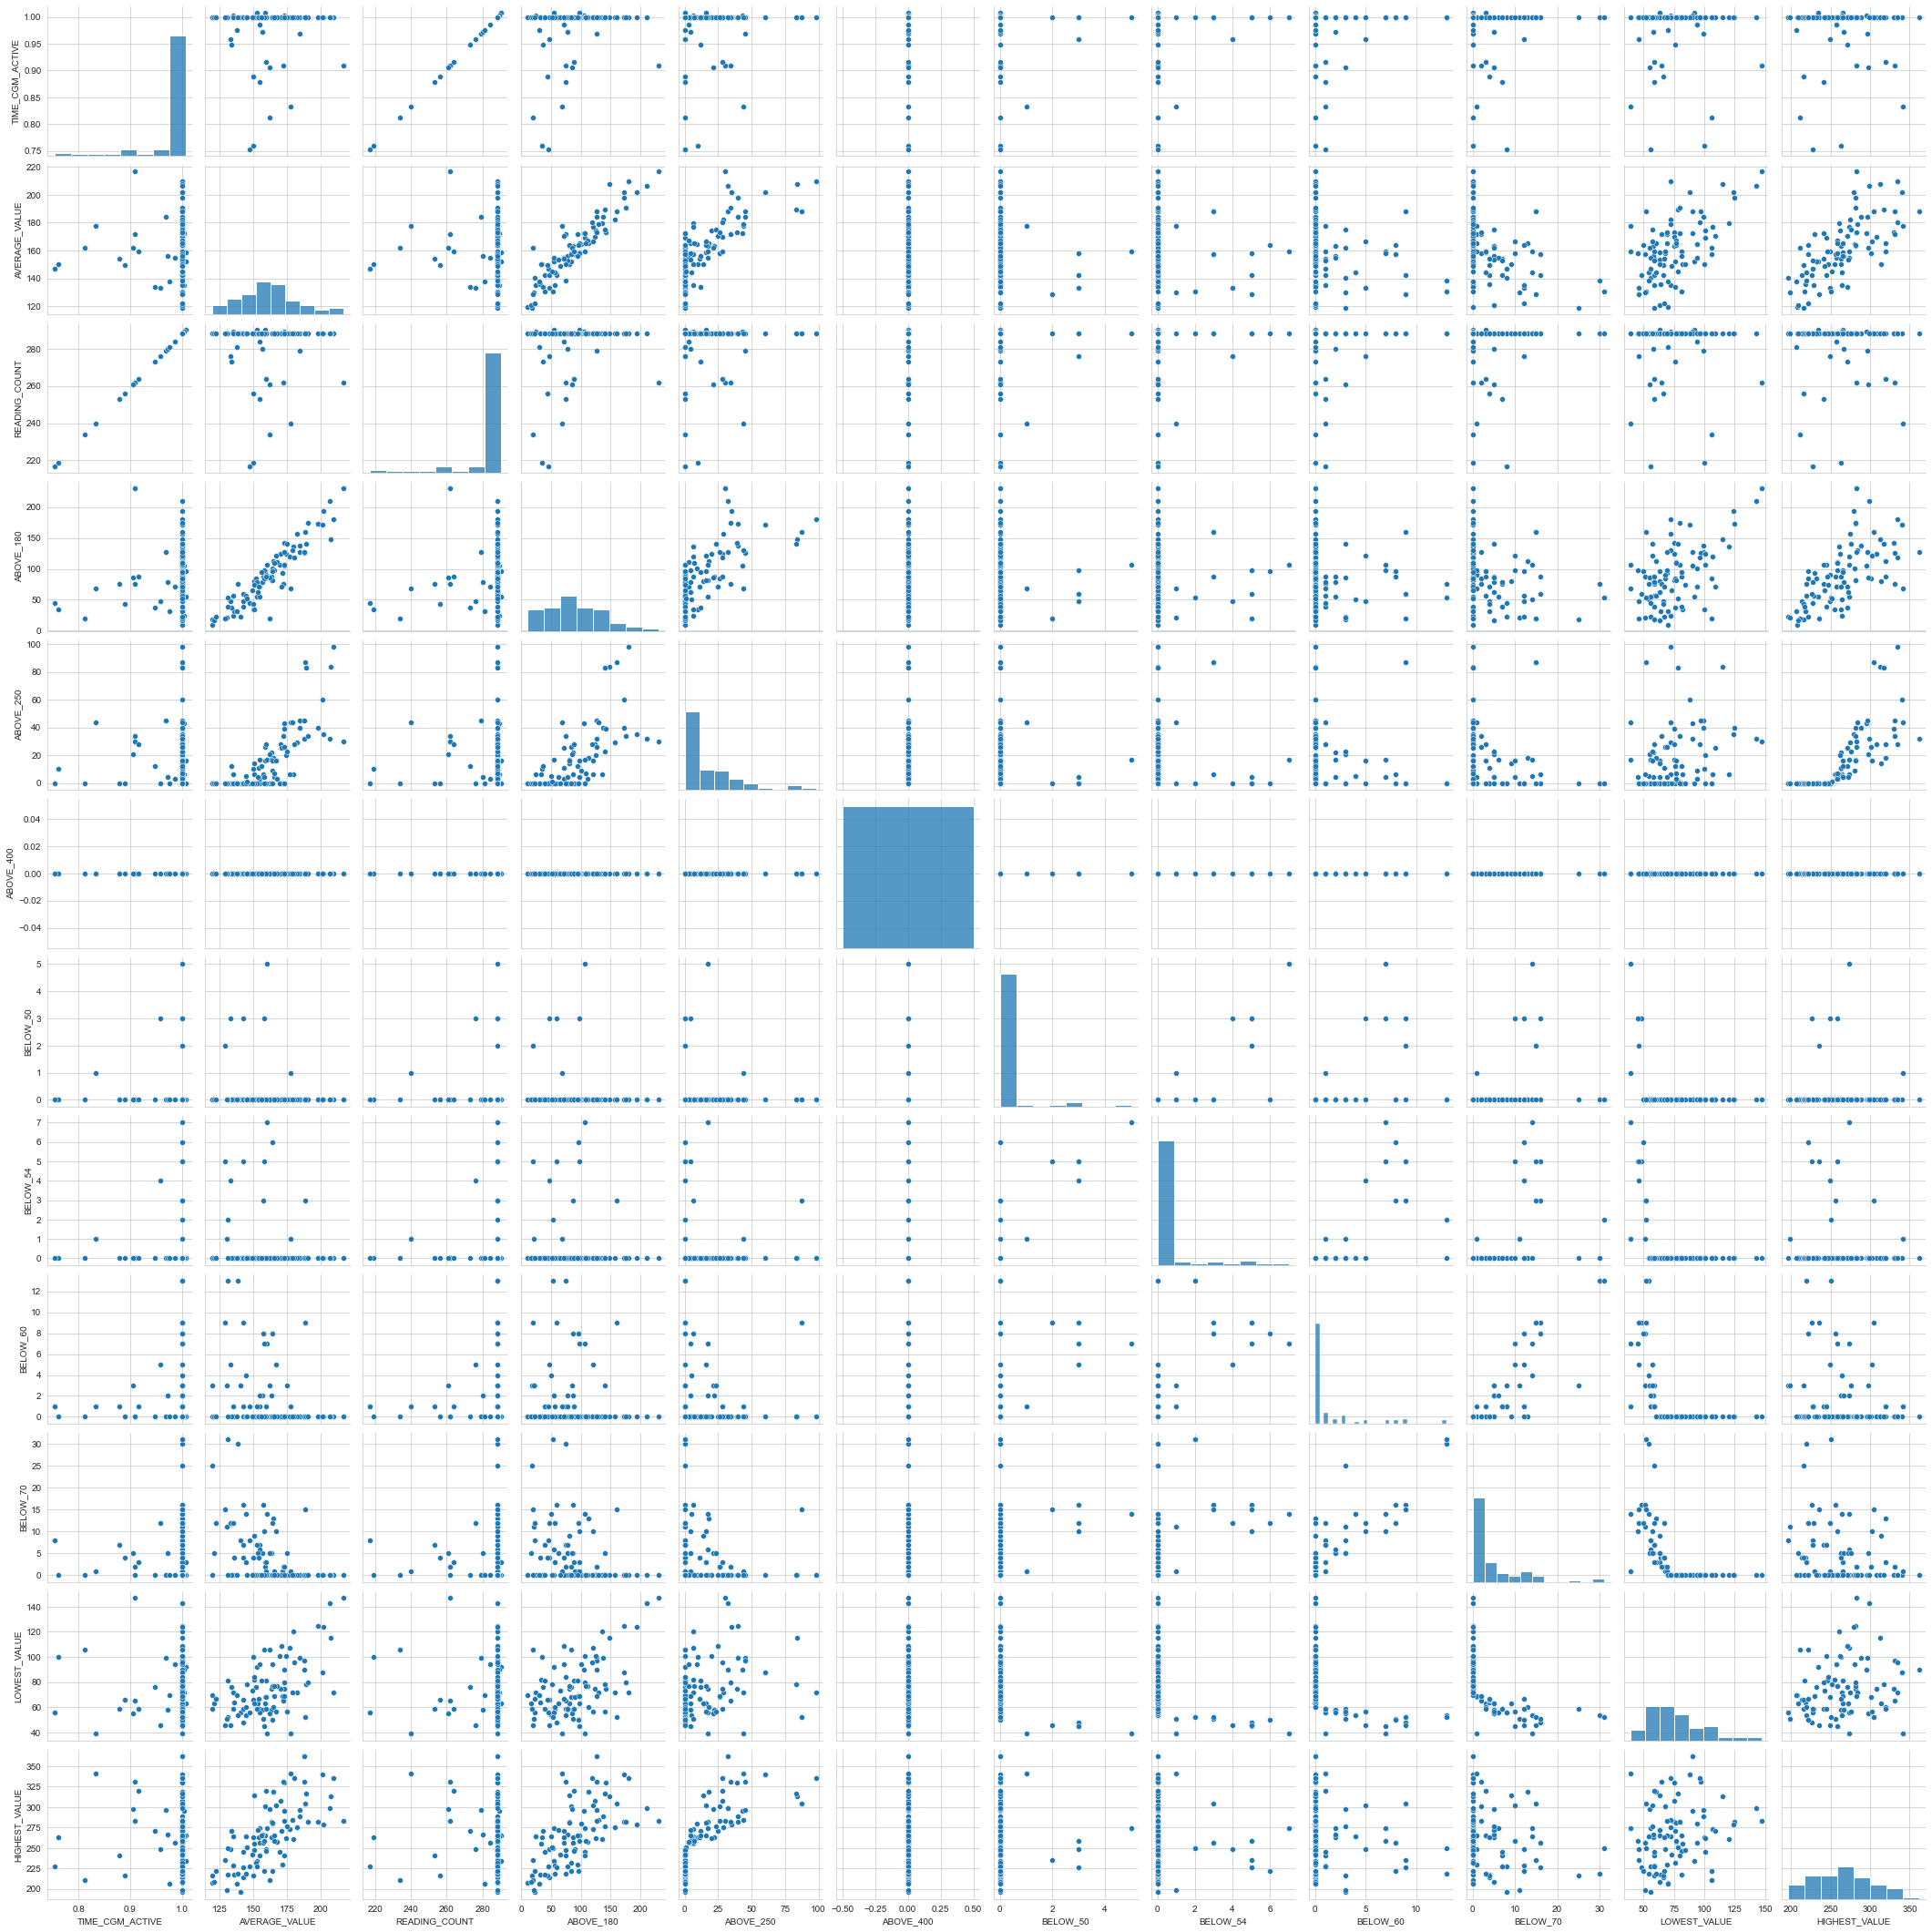

In [79]:
sns.pairplot(patient_0[numerical_feature])

                       Patient_2064 lowest and higest value distribution                        


<AxesSubplot:ylabel='Count'>

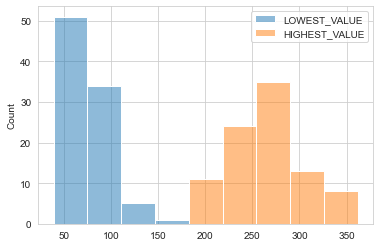

In [80]:
print('\033[1mPatient_2064 lowest and higest value distribution'.center(100))
sns.histplot(patient_0[threshold_feature])

                                 Different Reading Distribution                                 


C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\loc

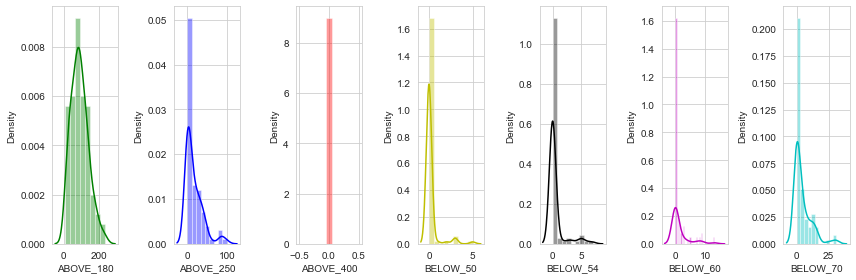

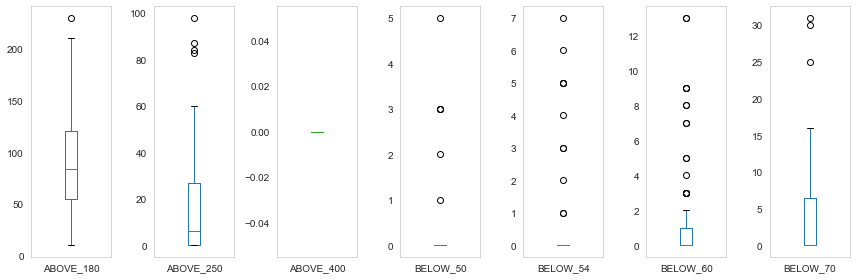

In [81]:
plot_reading(patient_0)


### 2.2.4 Single user cumulative feature distribution

### 2.3.1 pair plot to visulize any correlations, interesting distributions

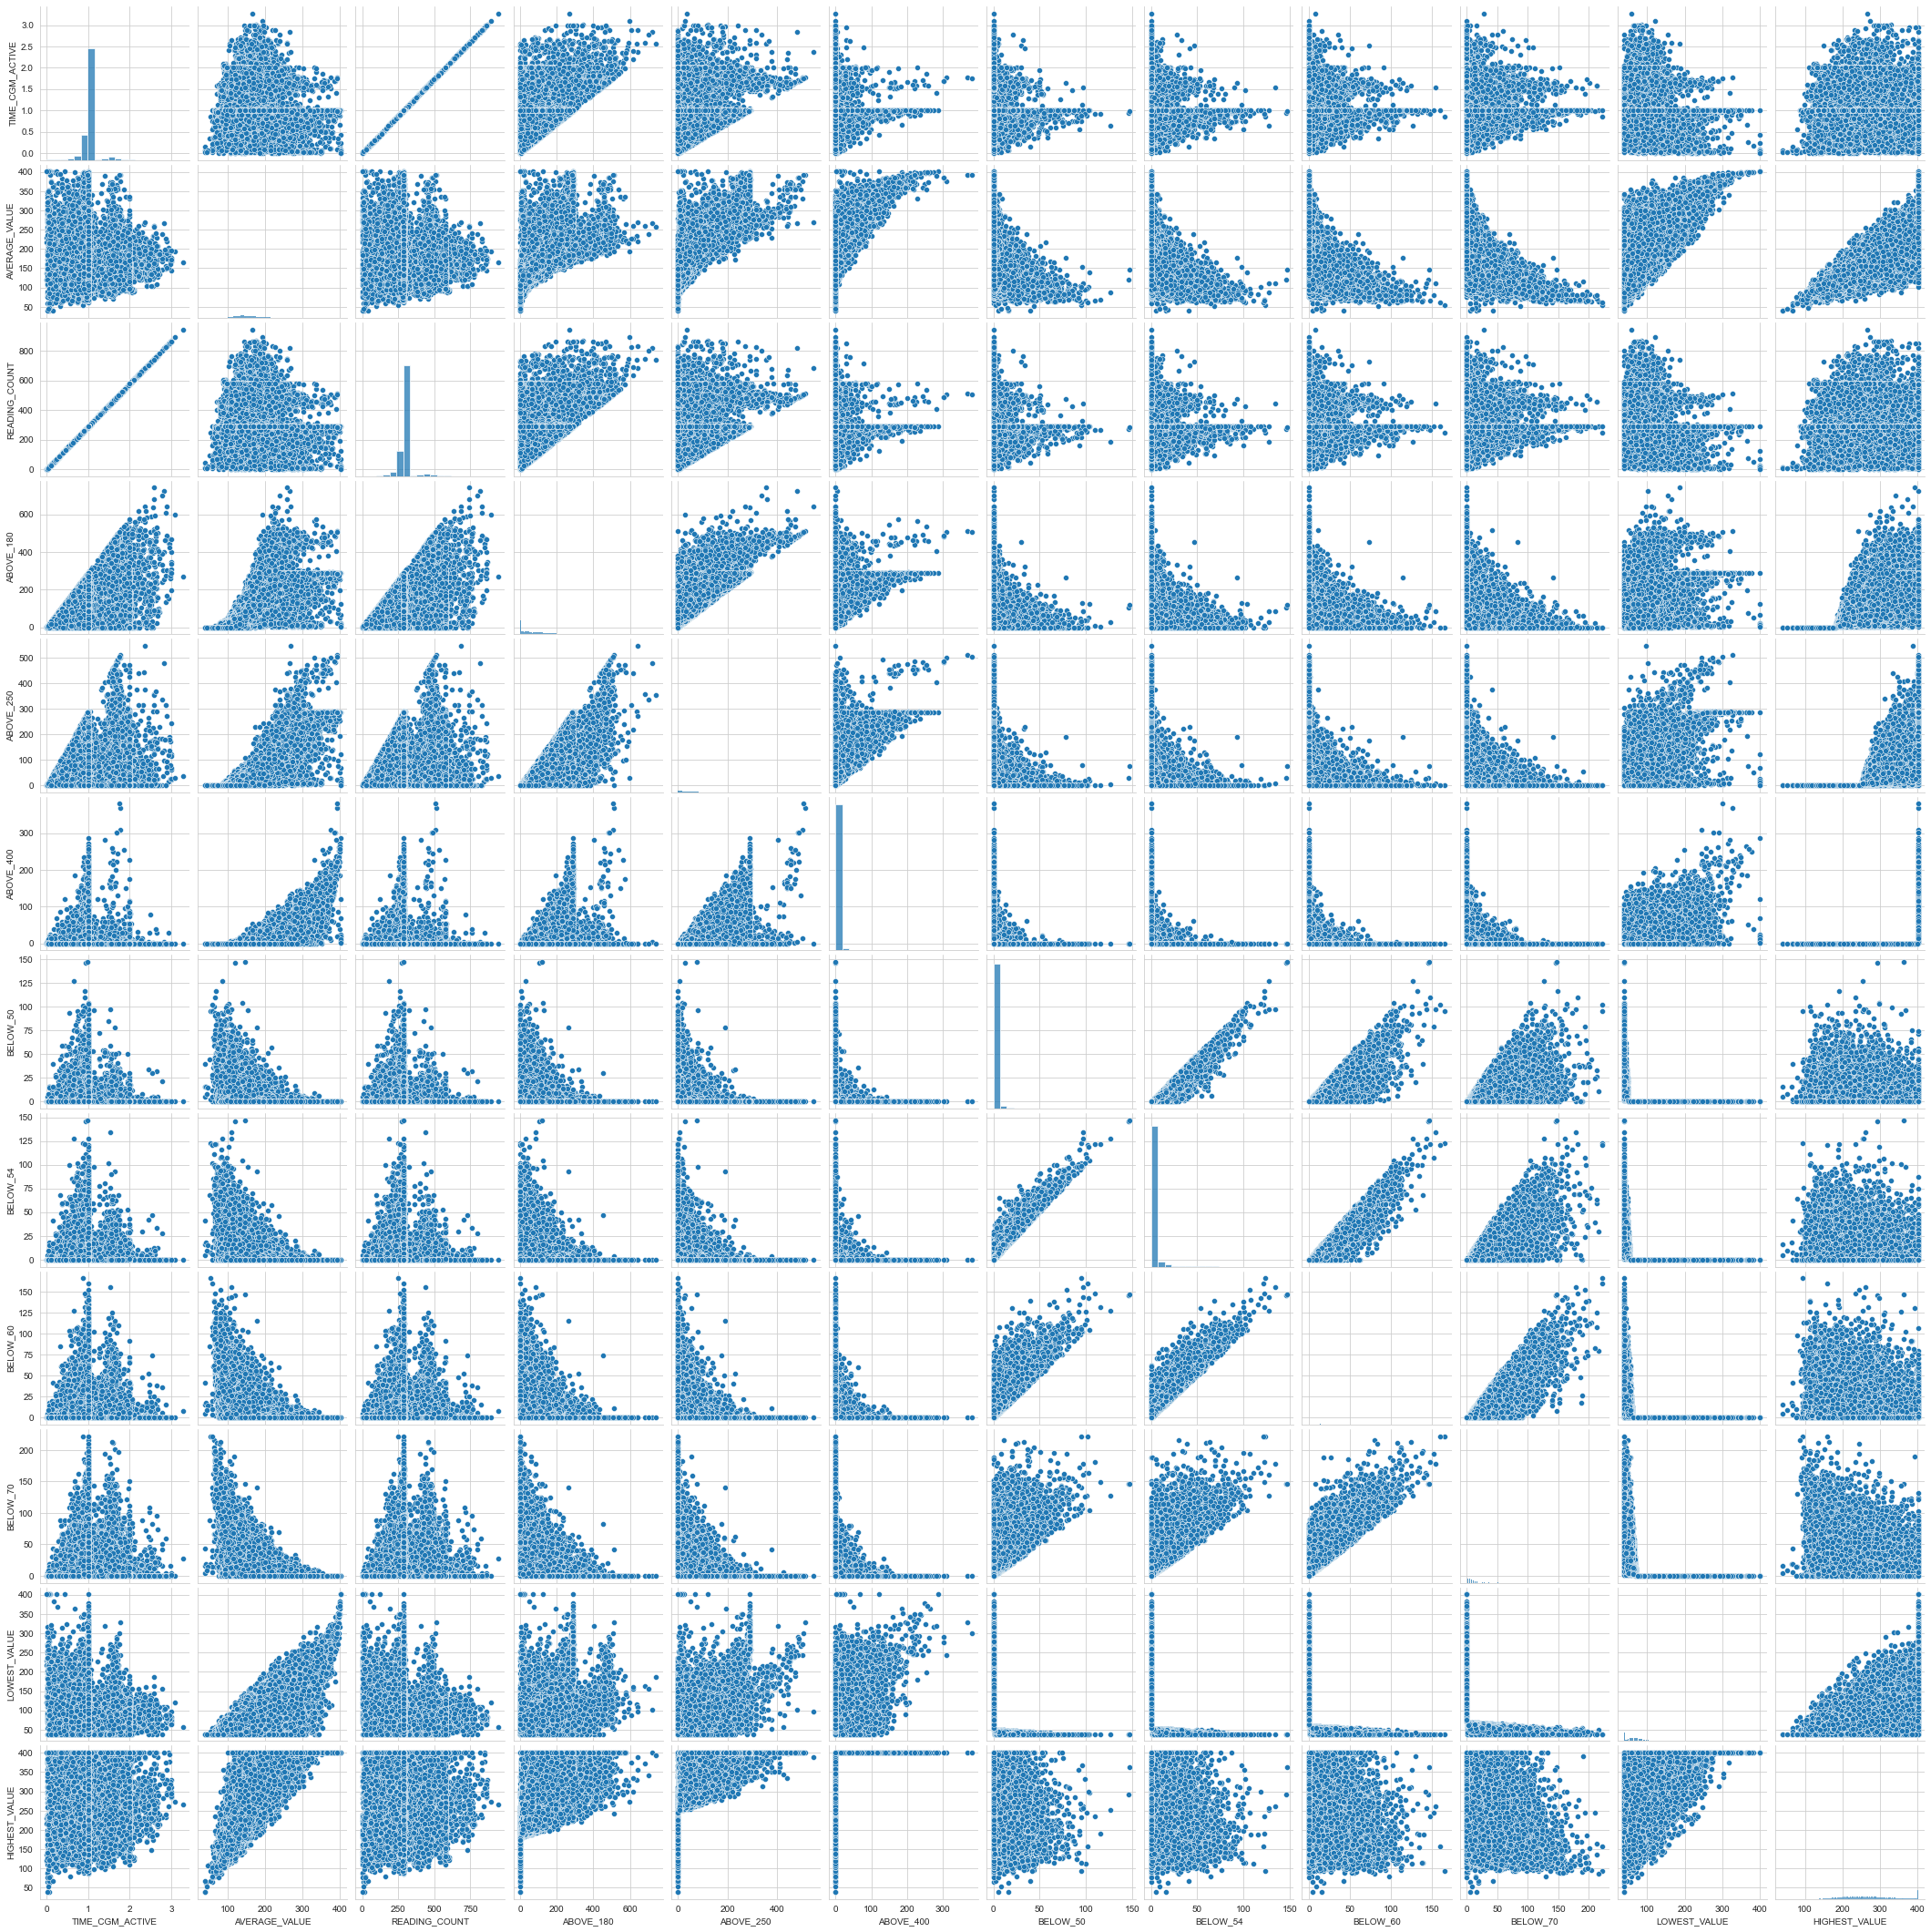

In [82]:
sns.pairplot(df_uds_num)

#### Inference from the pairplot:
1. CGM active reading is linearly correlated with reading count. Longer time will result in higher reading count.

2. Below 50 and below 54 is weakly correlated, probably due to these values are close to each other.

3. Value 180 and 250 showed interesting feature with reading count. There are clear boundary for those data.

4. Above 400, below 50, below 54, below 60, below 70 showed interesting psudo-normal distribution with peak around 250 readings. 
*What happened at that reading number?*

### 2.3.2 Plot distibutions for different values with reading features

                                 Different Reading Distribution                                 


C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\loc

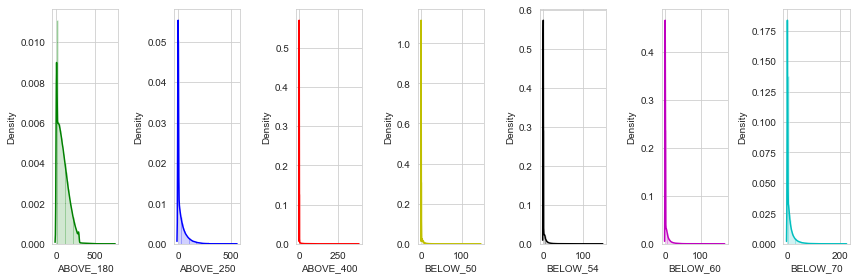

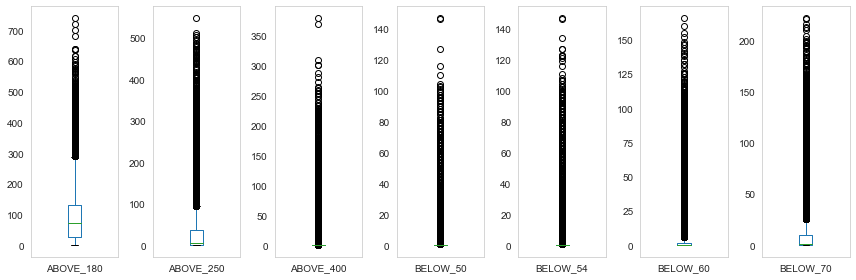

In [83]:
plot_reading(df_uds_reading)


#### The distribution data of different reading values remind the range of the readings mostly in above 180 or below 70
### 2.3.3 Statistical data of reading features

In [84]:
df_uds_reading.head()

ABOVE_180  ABOVE_250  ABOVE_400  BELOW_50  BELOW_54  BELOW_60  BELOW_70
0         87         22          0         0         0         2         5
1        137         39          0         0         0         0         3
2         13          0          0         0         0         0         6
3         17          0          0         0         0         0        10
4         27          0          0         0         4        12        27

In [85]:
df_uds_reading.describe()

ABOVE_180      ABOVE_250      ABOVE_400       BELOW_50  \
count  375830.000000  375830.000000  375830.000000  375830.000000   
mean       88.466998      27.034361       1.317997       0.880941   
std        73.220202      43.899628       8.591071       3.741291   
min         0.000000       0.000000       0.000000       0.000000   
25%        29.000000       0.000000       0.000000       0.000000   
50%        74.000000       6.000000       0.000000       0.000000   
75%       133.000000      38.000000       0.000000       0.000000   
max       741.000000     548.000000     380.000000     147.000000   

            BELOW_54       BELOW_60       BELOW_70  
count  375830.000000  375830.000000  375830.000000  
mean        1.460421       2.963303       7.979262  
std         5.046640       7.768414      14.620083  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       1.000000  
75%         0.000000       2.000000      10.000000  
max       147.000000     166.000000     222.000000

### 2.3.4 Non-zero readings for these reading features. This feature indicates the gluocose level of all patients.
If the reading is zero, it means there is no record for the value. Then we can explore non-zero data.
Here we can find out for each set level, what are non-zero readings. Then we could find out the distribution of these value among patients.

Mean value of new calculated value by removing Zero
ABOVE_180 remained data percentage: 91.56 mean: 96.63 50%: 82.0 75%: 140.0 25%: 40.0
ABOVE_250 remained data percentage: 55.43 mean: 48.77 50%: 33.0 75%: 67.0 25%: 14.0
ABOVE_400 remained data percentage: 5.6 mean: 23.52 50%: 14.0 75%: 30.0 25%: 6.0
BELOW_50 remained data percentage: 13.2 mean: 6.68 50%: 4.0 75%: 8.0 25%: 2.0
BELOW_54 remained data percentage: 19.08 mean: 7.65 50%: 5.0 75%: 9.0 25%: 2.0
BELOW_60 remained data percentage: 30.21 mean: 9.81 50%: 6.0 75%: 12.0 25%: 3.0
BELOW_70 remained data percentage: 50.64 mean: 15.76 50%: 10.0 75%: 20.0 25%: 5.0


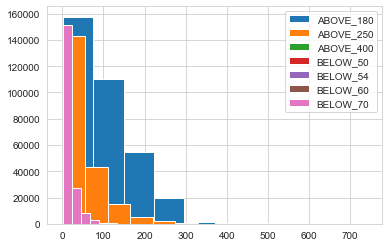

In [86]:
print("Mean value of new calculated value by removing Zero")
for f in range(len(reading_feature)):
    reading_ = df_uds_reading[df_uds_reading[reading_feature[f]]>0]
    m = df_uds_reading[df_uds_reading[reading_feature[f]]>0].mean()
    i = df_uds_reading[df_uds_reading[reading_feature[f]]>0].quantile(q=0.5)
    r = df_uds_reading[df_uds_reading[reading_feature[f]]>0].quantile(q=0.25)
    q = df_uds_reading[df_uds_reading[reading_feature[f]]>0].quantile(q=0.75)
    print(m.index[f], "remained data percentage:", round(100* reading_.shape[0]/df_uds_reading.shape[0],2), "mean:",round(m[f],2), "50%:",round(i[f],2), "75%:",round(q[f],2),"25%:",round(r[f],2))
    
    reading_[reading_feature[f]].hist(legend=True)
    plt.legend()

Most of the values are Zero data. We can transpose to explore individual user's data.

Most patients' data -- 91.56% showed values above 180.

5.6% patients showed hyper-value above 400.

50.64% patients shower hypo-value below 70.

### 2.3.5 Transpose the data to explore individual user's data

In [88]:
df_uds_reading_transpose = df_uds_reading.T

In [89]:
df_uds_reading_transpose.head(7)

0       1       2       3       4       5       6       7       \
ABOVE_180      87     137      13      17      27     175       0     222   
ABOVE_250      22      39       0       0       0     102       0      93   
ABOVE_400       0       0       0       0       0       0       0       0   
BELOW_50        0       0       0       0       0       0       0       0   
BELOW_54        0       0       0       0       4       0       0       0   
BELOW_60        2       0       0       0      12       0       8       0   
BELOW_70        5       3       6      10      27       0      27       0   

           8       9       ...  375820  375821  375822  375823  375824  \
ABOVE_180      52      36  ...       0     120      46     270      14   
ABOVE_250       0      16  ...       0      42       0     111       0   
ABOVE_400       0       0  ...       0       0       0       0       0   
BELOW_50        0       0  ...       0       0       0       0       0   
BELOW_54        0       0  ...       2       0       0       0       0   
BELOW_60        0       0  ...       4       0       0       0       0   
BELOW_70        3       1  ...       5       0       4       0       3   

           375825  375826  375827  375828  375829  
ABOVE_180       8      17      86       0     203  
ABOVE_250       0       0       0       0      48  
ABOVE_400       0       0       0       0       0  
BELOW_50        0       0       0       0       0  
BELOW_54        0       0       0       0       0  
BELOW_60        5       9       0       0       0  
BELOW_70       15      25       0      13       0  

[7 rows x 375830 columns]

Can we identify most severe syptoms patients?

1. Use reading counts.
2. Use hyper or hypo values.

### 2.3.6 Identify the severity of patient's syptom with values.
### 2.3.7 Data clean based on the label, remove data that are all zero

### 2.3.6.1 Explore highest value and lowest value distribution among all patients

In [90]:
df_uds_ths.describe().T


count        mean        std   min    25%    50%    75%  \
LOWEST_VALUE   375830.0   74.545346  27.175515  39.0   57.0   69.0   86.0   
HIGHEST_VALUE  375830.0  266.647630  66.257170  39.0  217.0  260.0  311.0   

                 max  
LOWEST_VALUE   401.0  
HIGHEST_VALUE  401.0

<AxesSubplot:ylabel='Count'>

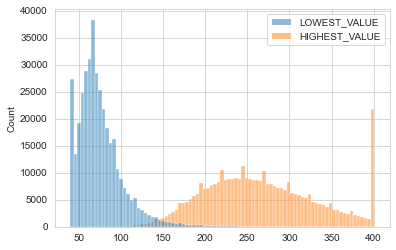

In [91]:
sns.histplot(df_uds_ths)

In [92]:
df_uds_ths.isna().sum()

LOWEST_VALUE     0
HIGHEST_VALUE    0
dtype: int64

### 2.4 Cumulative data exploration

### 2.4.1 Basic info exploration, describe, distribution

In [93]:
df_uds_cul.head()

TOTAL_INSULIN  TOTAL_BASAL  TOTAL_BOLUS
0            NaN          NaN          NaN
1           30.8        21.15         9.65
2            NaN          NaN          NaN
3            NaN          NaN          NaN
4            NaN          NaN          NaN

In [94]:
df_uds_cul.dropna(inplace=True)

C:\Users\edwar\AppData\Local\Temp\ipykernel_16724\2701973318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uds_cul.dropna(inplace=True)


In [95]:
df_uds_cul.describe()

TOTAL_INSULIN    TOTAL_BASAL    TOTAL_BOLUS
count  156858.000000  156858.000000  156858.000000
mean       47.424818      24.287484      23.137334
std       377.682617     377.014793      16.885673
min         0.000000       0.000000       0.000000
25%        29.000000      14.750000      11.900000
50%        41.400000      20.850000      19.350000
75%        58.300000      29.300000      30.150000
max    148620.900000  148573.250000     249.400000

C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\loc

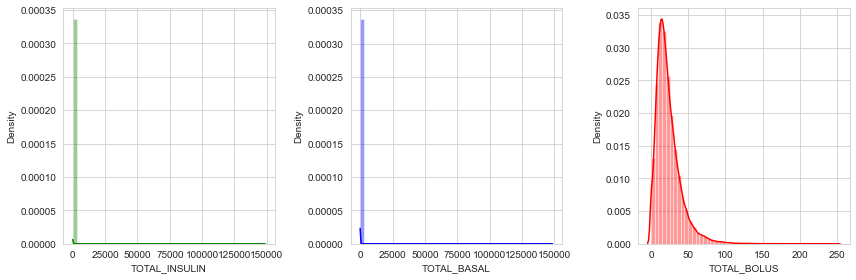

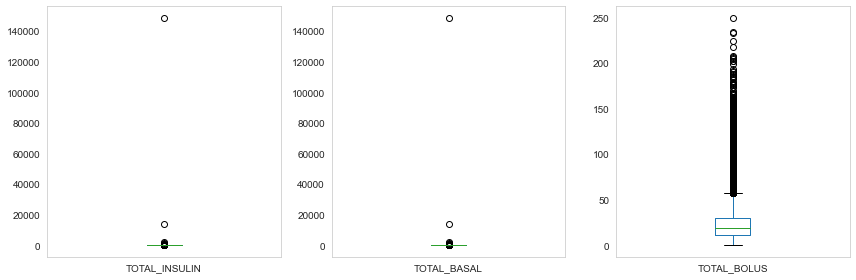

In [96]:
plot_culmulative(df_uds_cul)


### 2.4.2 Clean data, removing outliers
There are two values way off chart, we may remove these two values and replot.

In [97]:
df_uds_cul_reduced = df_uds_cul[df_uds_cul['TOTAL_INSULIN']<13900]
print("Count of removed data",df_uds_cul.shape[0]-df_uds_cul_reduced.shape[0])

Count of removed data 2


#### Identified two outliers with the following equation

df_uds_cul_outliers = df_uds_cul[df_uds_cul['TOTAL_INSULIN']>13900]

In [98]:
df_uds_cul_outliers = df_uds_cul[df_uds_cul['TOTAL_INSULIN']>13900]
df_uds_cul_outliers.head()

TOTAL_INSULIN  TOTAL_BASAL  TOTAL_BOLUS
74483         13982.9     13957.75        25.15
256357       148620.9    148573.25        47.65

#### Two users 74483, 256357 should be taken into a further count

In [100]:
users_ds_df.loc[[74483,256357]]

Unnamed: 0  USER_ID  TIME_CGM_ACTIVE  AVERAGE_VALUE  READING_COUNT  \
74483        74483     3948              1.0     181.510417            288   
256357      256357     2988              1.0     111.614583            288   

        ABOVE_180  ABOVE_250  ABOVE_400  BELOW_50  BELOW_54  ...  \
74483         120         32          0         0         0  ...   
256357          0          0          0         0         0  ...   

        LOWEST_VALUE  HIGHEST_VALUE        DATE  TOTAL_INSULIN TOTAL_BASAL  \
74483          100.0          328.0  2021-04-19        13982.9    13957.75   
256357          60.0          157.0  2021-06-02       148620.9   148573.25   

        TOTAL_BOLUS  HAS_REMOTE_SMBG_DATA  HAS_REMOTE_CGM_DATA  \
74483         25.15                 False                 True   
256357        47.65                 False                 True   

       HAS_REMOTE_INSULIN_DATA HAS_IN_CLINIC_SYNC  
74483                     True              False  
256357                   False              False  

[2 rows x 22 columns]

In [101]:
df_uds_cul_reduced.describe()

TOTAL_INSULIN    TOTAL_BASAL    TOTAL_BOLUS
count  156856.000000  156856.000000  156856.000000
mean       46.388779      23.251614      23.137165
std        26.031560      14.846599      16.885666
min         0.000000       0.000000       0.000000
25%        29.000000      14.750000      11.900000
50%        41.400000      20.850000      19.350000
75%        58.300000      29.300000      30.150000
max      2462.700000    2462.700000     249.400000

C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\loc

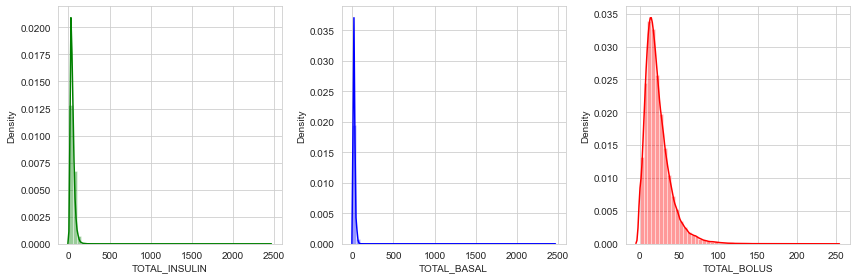

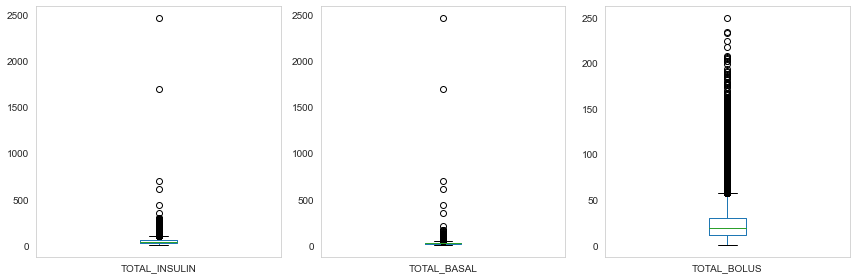

In [102]:

plot_culmulative(df_uds_cul_reduced)


### 2.4.3 Conslusion:

After removing TWO outliers with high total insulin and basal, the culmulative data is easily be observed as normal distribution.  The below mean values are more meaningful.

        TOTAL_INSULIN	TOTAL_BASAL	TOTAL_BOLUS

    mean	46.388779	23.251614	23.137165

### 2.5 CGM or active monitoring with reading count.
How many patients wearing these devices?
Are these readings having impact for the glucose level monitoring?

In [103]:
df_uds_cat.dtypes

HAS_REMOTE_SMBG_DATA       object
HAS_REMOTE_CGM_DATA        object
HAS_REMOTE_INSULIN_DATA    object
HAS_IN_CLINIC_SYNC         object
dtype: object

In [104]:
df_uds_cat.describe().T

count unique    top    freq
HAS_REMOTE_SMBG_DATA     375649      2  False  361801
HAS_REMOTE_CGM_DATA      375649      2   True  375648
HAS_REMOTE_INSULIN_DATA  375649      2  False  268611
HAS_IN_CLINIC_SYNC       375649      2  False  374908

#### There is noly one use not have remote CGM

In [106]:
users_ds_df[users_ds_df['HAS_REMOTE_CGM_DATA']==False]

Unnamed: 0  USER_ID  TIME_CGM_ACTIVE  AVERAGE_VALUE  READING_COUNT  \
313380      313380     4090         0.604167     140.551724            174   

        ABOVE_180  ABOVE_250  ABOVE_400  BELOW_50  BELOW_54  ...  \
313380         16          0          0         0         0  ...   

        LOWEST_VALUE  HIGHEST_VALUE        DATE  TOTAL_INSULIN TOTAL_BASAL  \
313380          84.0          208.0  2021-06-15          21.61       15.78   

        TOTAL_BOLUS  HAS_REMOTE_SMBG_DATA  HAS_REMOTE_CGM_DATA  \
313380         5.83                 False                False   

       HAS_REMOTE_INSULIN_DATA HAS_IN_CLINIC_SYNC  
313380                   False               True  

[1 rows x 22 columns]

### 2.6 Explore all users in the same period of time distribution

In [107]:
date_u = users_ds_df['DATE'].unique()
df_uds_date_0 = users_ds_df[users_ds_df['DATE']==date_u[0]]

In [108]:
df_uds_date_0.describe().T

count         mean          std        min          25%  \
Unnamed: 0       4130.0  2064.500000  1192.372635   0.000000  1032.250000   
USER_ID          4130.0  2064.500000  1192.372635   0.000000  1032.250000   
TIME_CGM_ACTIVE  4130.0     0.996810     0.153430   0.003472     1.000000   
AVERAGE_VALUE    4130.0   157.884877    39.752414  39.000000   130.307292   
READING_COUNT    4130.0   287.081356    44.187941   1.000000   288.000000   
ABOVE_180        4130.0    86.380145    72.714012   0.000000    28.000000   
ABOVE_250        4130.0    25.917191    42.478874   0.000000     0.000000   
ABOVE_400        4130.0     1.246973     7.591599   0.000000     0.000000   
BELOW_50         4130.0     0.852300     3.783109   0.000000     0.000000   
BELOW_54         4130.0     1.396610     5.133537   0.000000     0.000000   
BELOW_60         4130.0     2.880145     7.840745   0.000000     0.000000   
BELOW_70         4130.0     7.793947    14.480222   0.000000     0.000000   
LOWEST_VALUE     4130.0    74.849218    27.148165  39.000000    57.000000   
HIGHEST_VALUE    4130.0   264.646213    65.511174  39.000000   216.000000   
TOTAL_INSULIN    1700.0    46.593153    24.447982   0.000000    29.800000   
TOTAL_BASAL      1700.0    23.321441    12.414673   0.000000    14.850000   
TOTAL_BOLUS      1700.0    23.271712    16.462887   0.000000    12.250000   

                         50%          75%          max  
Unnamed: 0       2064.500000  3096.750000  4129.000000  
USER_ID          2064.500000  3096.750000  4129.000000  
TIME_CGM_ACTIVE     1.000000     1.000000     2.319444  
AVERAGE_VALUE     151.616992   177.828125   369.776256  
READING_COUNT     288.000000   288.000000   668.000000  
ABOVE_180          71.000000   130.000000   537.000000  
ABOVE_250           5.000000    35.750000   313.000000  
ABOVE_400           0.000000     0.000000   130.000000  
BELOW_50            0.000000     0.000000    73.000000  
BELOW_54            0.000000     0.000000    87.000000  
BELOW_60            0.000000     2.000000   113.000000  
BELOW_70            1.000000    10.000000   204.000000  
LOWEST_VALUE       69.000000    86.000000   269.000000  
HIGHEST_VALUE     259.000000   307.000000   401.000000  
TOTAL_INSULIN      41.500000    58.550000   208.550000  
TOTAL_BASAL        21.050000    29.612500    97.850000  
TOTAL_BOLUS        19.650000    30.050000   117.900000

In [109]:
len(df_uds_date_0['USER_ID'].unique())

4130

                                 Different Reading Distribution                                 


C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\loc

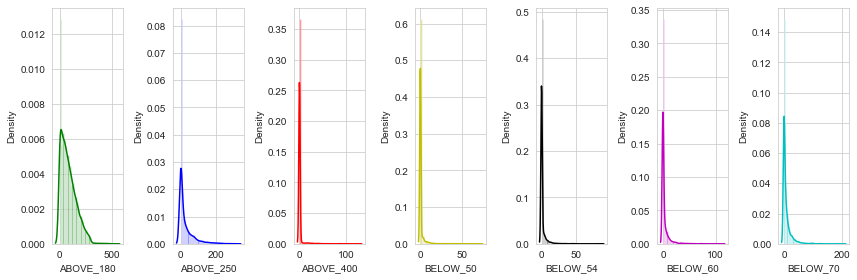

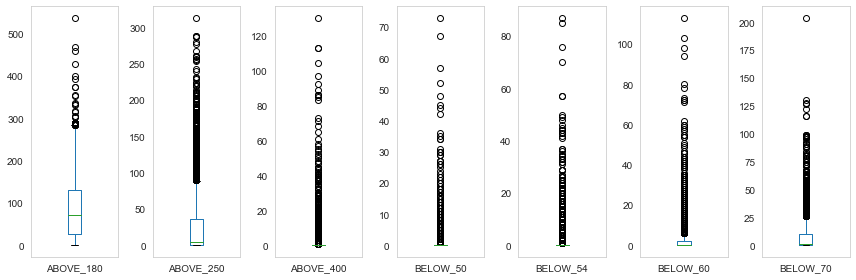

In [110]:
plot_reading(df_uds_date_0)

<AxesSubplot:title={'center':' Total distribution'}, ylabel='Count'>

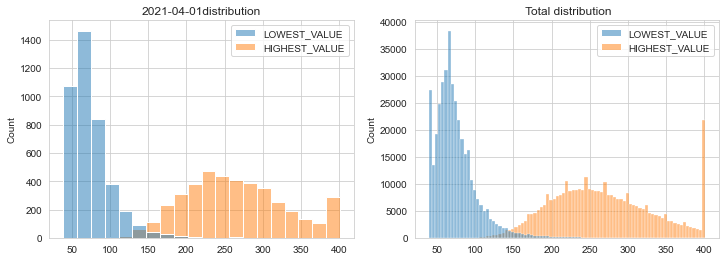

In [111]:
figsize = (12, 4)
plt.figure(figsize=figsize)
plt.subplot(1,2,1)
plt.title(date_u[0]+"distribution")
sns.histplot(df_uds_date_0[threshold_feature])
plt.subplot(1,2,2)
plt.title(" Total distribution")

sns.histplot(df_uds_ths)

### Conclusions:
1. All data without differentiate unique users, highest value and lowest value have the similar distribution.
2. Single user in different period tends to have better distritubtion of observed values.
3. There are two outliers for total insulin value need to take care of.
4. Above 180 values accounts the most for the data in all users' different period collection.
5. One user doesn't have CGM data

## Objective 3. Understand continuous data collection CGM

### A quick look at the data

In [112]:
users_cgm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187189 entries, 0 to 1187188
Data columns (total 4 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1187189 non-null  int64  
 1   DISPLAY_TIMESTAMP           1187189 non-null  object 
 2   DENORMALIZED_GLUCOSE_VALUE  1187189 non-null  float64
 3   USER_ID                     1187189 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 36.2+ MB


In [113]:
users_cgm_df.describe().T

count           mean            std   min  \
Unnamed: 0                  1187189.0  593594.000000  342712.088702   0.0   
DENORMALIZED_GLUCOSE_VALUE  1187189.0     157.814352      63.638577  39.0   
USER_ID                     1187189.0    2067.781821    1192.064036   0.0   

                                 25%       50%       75%        max  
Unnamed: 0                  296797.0  593594.0  890391.0  1187188.0  
DENORMALIZED_GLUCOSE_VALUE     111.0     146.0     192.0      401.0  
USER_ID                       1038.0    2066.0    3100.0     4129.0

In [114]:
users_cgm_df['USER_ID'].nunique()

4130

Check the date range - it is only one day's worth of data

In [115]:
min(users_cgm_df['DISPLAY_TIMESTAMP'])

'2021-04-01 00:00:00'

In [116]:
max(users_cgm_df['DISPLAY_TIMESTAMP'])

'2021-04-01 23:59:59'

Check a couple users to see that the CGM data matches the daily stats data - it does

In [117]:
temp_user_num = 1
users_ds_df[['READING_COUNT','AVERAGE_VALUE','LOWEST_VALUE','HIGHEST_VALUE']][(
    users_ds_df['USER_ID'] == temp_user_num) & (users_ds_df['DATE'] == '2021-04-01')]

READING_COUNT  AVERAGE_VALUE  LOWEST_VALUE  HIGHEST_VALUE
3972            210     172.814286          74.0          267.0

In [118]:
users_cgm_df['DENORMALIZED_GLUCOSE_VALUE'][users_cgm_df['USER_ID']==temp_user_num].describe()

count    210.000000
mean     172.814286
std       57.555039
min       74.000000
25%      122.000000
50%      166.500000
75%      228.750000
max      267.000000
Name: DENORMALIZED_GLUCOSE_VALUE, dtype: float64

In [119]:
temp_user_num = 567
users_ds_df[['READING_COUNT','AVERAGE_VALUE','LOWEST_VALUE','HIGHEST_VALUE']][(
            users_ds_df['USER_ID'] == temp_user_num) & (users_ds_df['DATE'] == '2021-04-01')]

READING_COUNT  AVERAGE_VALUE  LOWEST_VALUE  HIGHEST_VALUE
2447            288        131.875          43.0          280.0

In [120]:
users_cgm_df['DENORMALIZED_GLUCOSE_VALUE'][users_cgm_df['USER_ID']==temp_user_num].describe()

count    288.000000
mean     131.875000
std       48.852102
min       43.000000
25%      101.000000
50%      117.000000
75%      147.000000
max      280.000000
Name: DENORMALIZED_GLUCOSE_VALUE, dtype: float64

### Plot the amount of data for each user
Note: The number of readings should be 288 for a single day (24 hours with a reading every 5 minutes). If the device is not on for the entire day, there will be fewer readings. There is the possibility of a few extra readings if a new CGM device is worn, with some overlap with the old device. Note that some users have a lot more data, indicating that there is likely duplicate data and/or a person was wearing 2 CGM devices for a significant portion of time. If duplicate data exists, we will want to remove it.

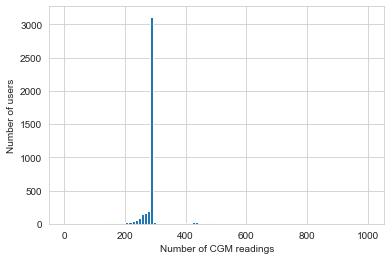

In [121]:
counts_per_user = (users_cgm_df.groupby(by=['USER_ID'])).size()
plt.hist(counts_per_user,bins=100);
plt.xlabel("Number of CGM readings")
plt.ylabel("Number of users");

In [122]:
counts_per_user.value_counts().head(10)

288    2668
289     200
290      52
287      42
263      37
282      37
280      28
264      28
285      27
281      26
dtype: int64

In [123]:
counts_per_user.describe()

count    4130.000000
mean      287.454964
std        46.174026
min         1.000000
25%       288.000000
50%       288.000000
75%       288.000000
max      1004.000000
dtype: float64

In [124]:
num_users_reg = counts_per_user.value_counts().values[0]
num_counts_reg = counts_per_user.value_counts().index[0]
print(f"{num_users_reg} users out of the "
      f"{len(counts_per_user)} total users have "
      f"{num_counts_reg} CGM readings.")

2668 users out of the 4130 total users have 288 CGM readings.


In [125]:
num_users_over = (counts_per_user > 288).sum()
print(f"{num_users_over} have over 288 CGM readings.")

489 have over 288 CGM readings.


Let's determine which user has 1004 CGM readings in a single day so we can take a closer look later.

In [126]:
counts_per_user.reset_index()
temp_user_id = (counts_per_user == 1004).values.nonzero()[0][0]
print(f"User {temp_user_id} has 1004 CGM readings in a single day.")

User 1475 has 1004 CGM readings in a single day.


Let's drop duplicate data

In [127]:
users_cgm_df = users_cgm_df.drop_duplicates(['DISPLAY_TIMESTAMP','USER_ID'])
users_cgm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162732 entries, 0 to 1187188
Data columns (total 4 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1162732 non-null  int64  
 1   DISPLAY_TIMESTAMP           1162732 non-null  object 
 2   DENORMALIZED_GLUCOSE_VALUE  1162732 non-null  float64
 3   USER_ID                     1162732 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 44.4+ MB


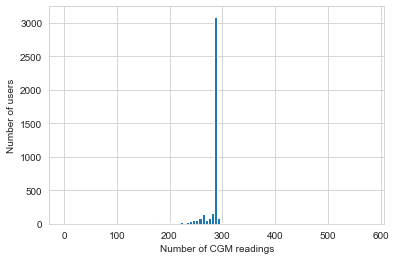

In [128]:
counts_per_user = (users_cgm_df.groupby(by=['USER_ID'])).size()
plt.hist(counts_per_user,bins=100);
plt.xlabel("Number of CGM readings")
plt.ylabel("Number of users");

In [129]:
counts_per_user.describe()

count    4130.000000
mean      281.533172
std        32.300666
min         1.000000
25%       288.000000
50%       288.000000
75%       288.000000
max       578.000000
dtype: float64

In [130]:
users_cgm_df['DISPLAY_TIMESTAMP'].head()

0    2021-04-01 02:49:50
1    2021-04-01 02:54:49
2    2021-04-01 02:59:49
3    2021-04-01 03:04:49
4    2021-04-01 03:09:49
Name: DISPLAY_TIMESTAMP, dtype: object

In [132]:
users_cgm_df['DISPLAY_TIMESTAMP'] = users_cgm_df['DISPLAY_TIMESTAMP'].apply(lambda x: x.split()[1])

In [133]:
users_cgm_df['DISPLAY_TIMESTAMP'].head()

0    02:49:50
1    02:54:49
2    02:59:49
3    03:04:49
4    03:09:49
Name: DISPLAY_TIMESTAMP, dtype: object

In [134]:
len(users_cgm_df['DISPLAY_TIMESTAMP'])

1162732

In [135]:
users_cgm_df['DISPLAY_TIMESTAMP'].nunique()

86400

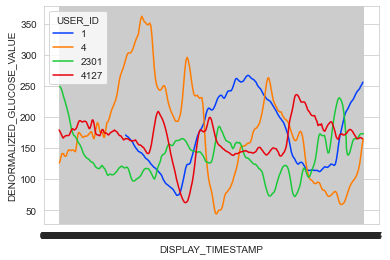

In [136]:
users_plot = [1, 4, 2301, 4127]
sample_data = users_cgm_df.loc[users_cgm_df['USER_ID'].isin(users_plot)
                              ].sort_values(by='DISPLAY_TIMESTAMP')
sns.lineplot(data=sample_data, x="DISPLAY_TIMESTAMP", 
             y="DENORMALIZED_GLUCOSE_VALUE", hue="USER_ID", palette="bright");
# Note: I'm not sure how to reduce/simplify the x-tick values since they are strings

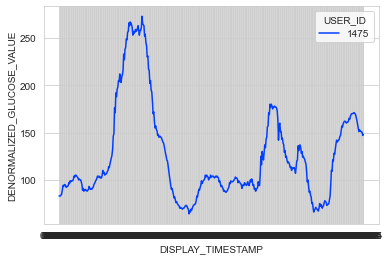

In [137]:
users_plot2 = [1475]
sample_data2 = users_cgm_df.loc[users_cgm_df['USER_ID'].isin(users_plot2)
                              ].sort_values(by='DISPLAY_TIMESTAMP')
sns.lineplot(data=sample_data2, x="DISPLAY_TIMESTAMP", 
             y="DENORMALIZED_GLUCOSE_VALUE", hue="USER_ID", palette="bright");

In [138]:
sample_data2.head(20)

Unnamed: 0 DISPLAY_TIMESTAMP  DENORMALIZED_GLUCOSE_VALUE  USER_ID
582407      582407          00:01:29                        83.0     1475
582408      582408          00:06:29                        83.0     1475
582409      582409          00:11:29                        83.0     1475
73598        73598          00:15:34                        84.0     1475
582410      582410          00:16:30                        85.0     1475
582411      582411          00:21:30                        89.0     1475
73599        73599          00:25:34                        94.0     1475
582412      582412          00:26:30                        93.0     1475
582413      582413          00:31:30                        95.0     1475
582414      582414          00:36:30                        95.0     1475
582415      582415          00:41:31                        94.0     1475
73600        73600          00:45:33                        92.0     1475
582416      582416          00:46:30                        93.0     1475
73601        73601          00:50:34                        93.0     1475
582417      582417          00:51:30                        94.0     1475
73602        73602          00:55:35                        97.0     1475
582418      582418          00:56:31                        96.0     1475
73603        73603          01:00:33                        99.0     1475
582419      582419          01:01:30                        98.0     1475
582420      582420          01:06:30                        99.0     1475

It looks like two devices are giving CGM readings, one at 5 minute intervals on the 30 or 31 second mark (one reading per 5 minutes is expected), and a second that is giving readings at irregular intervals.

In [139]:
sample_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 582407 to 1000605
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  467 non-null    int64  
 1   DISPLAY_TIMESTAMP           467 non-null    object 
 2   DENORMALIZED_GLUCOSE_VALUE  467 non-null    float64
 3   USER_ID                     467 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 18.2+ KB


## Objective 4. Understand intersection of three data files

### a. Check overlap of user id between files

In [140]:
users1 = users_info_df["ID"].sort_values().reset_index(drop=True)
users2 = users_ds_df["USER_ID"].drop_duplicates().sort_values().reset_index(drop=True)
users3 = users_cgm_df["USER_ID"].drop_duplicates().sort_values().reset_index(drop=True)

In [141]:
match_12 = (users1 == users2).sum()
match_13 = (users1 == users3).sum()
match_23 = (users2 == users3).sum()
print(f"{match_12} user ID's match between file 1 and 2 out of {len(users1)} users total")
print(f"{match_13} user ID's match between file 1 and 3 out of {len(users1)} users total")
print(f"{match_23} user ID's match between file 2 and 3 out of {len(users2)} users total")

4130 user ID's match between file 1 and 2 out of 4130 users total
4130 user ID's match between file 1 and 3 out of 4130 users total
4130 user ID's match between file 2 and 3 out of 4130 users total


### b. Plot correlations of variables across files
Looking at age and length of Glooko use time_cgm_active and different counts variables

- I'm actually not sure how to do this! The first file has a single row per user, 
- but the second file has multiple rows per user
- The same issue will arise when preparing data to fit a model, we will need to work it out.